In [1]:
!pip list

Package                       Version
----------------------------- -------------------
alabaster                     0.7.12
appdirs                       1.4.4
argh                          0.26.2
astroid                       2.5
async-generator               1.10
atomicwrites                  1.4.0
attrs                         20.3.0
autopep8                      1.5.6
Babel                         2.9.0
backcall                      0.2.0
bcrypt                        3.2.0
beautifulsoup4                4.9.3
black                         19.10b0
bleach                        3.3.0
brotlipy                      0.7.0
bs4                           0.0.1
certifi                       2020.12.5
cffi                          1.14.5
chardet                       4.0.0
click                         7.1.2
cloudpickle                   1.6.0
colorama                      0.4.4
cryptography                  3.4.7
cx-Oracle                     8.1.0
cycler                        0.10.0
deco

## Pandas 기초개념

pandas의 자료 유형:
-dataframe: excel의 sheet와 동일한 걔념
-series: sheet의 column 1개를 의미한다

이 두가지 유형의 데이터 분석을 위한 다양한 기능을 제공하는 python library이다.

### pandas의 read_csv 메서드를 통해 csv파일 읽어오기

#### 읽어오려는 파일과 현재 위치가 다른 폴더에 위치한다면, 아래와 같이 pd.read_csv(r'full 경로' )를 명시해야한다. 
#### 또는 ../를 통해 상위 dir로 이동 후 원하는 폴더로 위치를 이동한다.

In [1]:
import pandas as pd

# pd.read_csv()메서드는 읽어온 데이터 집합을 dataframe 자료형으로 반환한다.
df = pd.read_csv(r'C:\Study\Python\notebook\data2\gapminder.tsv', sep='\t') #full경로
type(df)

pandas.core.frame.DataFrame

In [8]:
# df.head()는 dataframe df의 첫 5행을 출력한다.
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [2]:
type(df.head())

pandas.core.frame.DataFrame

In [4]:
print(df.shape)
#df.shape은 dataframe df의 행과 열 크기를 알려준다. tuple형태로, (행,열) 이 순서대로 출력.
type(df.shape)

(1704, 6)


tuple

In [11]:
df.shape[0]

1704

In [13]:
print(df.shape[0])
print(df.shape[1])

1704
6


In [14]:
#dataframe의 columns의 이름 확인
df.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

In [15]:
#자료형을 구성하는 데이터 타입 확인
df.dtypes

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


### pandas와 python 자료형 비교

**pandas:** 
문자열:object
정수: int64
실수: float64
python 표준 아이브러리(datetime)가 반환하는 자료형: datetime

**python:**
문자열: string
정수: int
실수: foat
python 표준 아이브러리(datetime)가 반환하는 자료형: datetime


###  열 단위 데이터 추출하기

데이터프레임에서 데이터를 열 단위로 추출하려면 대괄호([ ])와 열 이름을 사용해야 한다.
데이터프레임 에서 열 이름으로 추출한 데이터는 시리즈 자료형이다.

시리즈도 head, tail 메서드로 앞과 뒤에서 5개의 데이터를 출력한다..
리스트에 열 이름들을 담아 전달하면 여러 개의 열을 한 번에 추출할 수 있다.

2개 이상의 열을 추출한 데이터 --> 데이터프레임으로 반환된다.

In [18]:
country_df = df['country']
print(type(country_df))

<class 'pandas.core.series.Series'>


In [20]:
print(country_df.head())

0    Afghanistan
1    Afghanistan
2    Afghanistan
3    Afghanistan
4    Afghanistan
Name: country, dtype: object


In [19]:
print(country_df.tail())

1699    Zimbabwe
1700    Zimbabwe
1701    Zimbabwe
1702    Zimbabwe
1703    Zimbabwe
Name: country, dtype: object


In [22]:
subset = df[['country','continent','year']]
print(type(subset))
print(subset.head())
print(subset.tail())

<class 'pandas.core.frame.DataFrame'>
       country continent  year
0  Afghanistan      Asia  1952
1  Afghanistan      Asia  1957
2  Afghanistan      Asia  1962
3  Afghanistan      Asia  1967
4  Afghanistan      Asia  1972
       country continent  year
1699  Zimbabwe    Africa  1987
1700  Zimbabwe    Africa  1992
1701  Zimbabwe    Africa  1997
1702  Zimbabwe    Africa  2002
1703  Zimbabwe    Africa  2007


###  행 단위 데이터 추출하기

데이터를 행 단위로 추출하려면 loc, iloc 속성을 사용한다.
**loc:** 인덱스를 기준으로 행 데이터 추출
**iloc:** 행 번호를 기준으로 행 데이터 추출

DataFrame에서 인덱스는 보통 0 부터 시작하는 숫자이지만, 문자열로 인덱스를 사용할 수 있다. 
e.g., first, second, third와 같이 문자열은 인덱스로 지정할 수 있다.

DataFrame에서 행 번호는 데이터의 순서를 따라가기 때문에 정수만으로 데이터를 조회하거나 추출할 수 있으며 
**실제 데이터 프레임에서는 확인할 수 없다.**


### loc속성으로 행 데이터 추출하기

loc속성에 대괄호를 이용하여 인덱스를 전달하면 행 데이터를 추출할 수 있다.
인덱스가 존재하는 0은 데이터가 잘 추출되지만 인덱스에 없는 -1를 사용하면 오류가 난다.

In [5]:
df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [6]:
df.loc[0]

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap     779.445314
Name: 0, dtype: object

In [7]:
df.loc[99]

country      Bangladesh
continent          Asia
year               1967
lifeExp          43.453
pop            62821884
gdpPercap    721.186086
Name: 99, dtype: object

In [8]:
df.shape

(1704, 6)

In [30]:
number_of_rows = df.shape[0]
last_row_index = number_of_rows -1
print(last_row_index)

1703


In [37]:
print(df.loc[last_row_index])
type(df.loc[last_row_index])

country        Zimbabwe
continent        Africa
year               2007
lifeExp          43.487
pop            12311143
gdpPercap    469.709298
Name: 1703, dtype: object


pandas.core.series.Series

### ※ 참고 tail메서드와 loc속성이 반환하는 자료형은 다르다.

tail 메서드: dataframe
vs.
loc 속성(인덱스 1개 호출의 경우): series
loc 속성(인덱스 2개이상의 호출의 경우): dataframe

In [9]:
df.tail(n=1)

,country,continent,year,lifeExp,pop,gdpPercap
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298


In [11]:
type(df.tail(n=1))

pandas.core.frame.DataFrame

In [10]:
print(df.tail(n=2))
type(df.tail(n=2))

       country continent  year  lifeExp       pop   gdpPercap
1702  Zimbabwe    Africa  2002   39.989  11926563  672.038623
1703  Zimbabwe    Africa  2007   43.487  12311143  469.709298


pandas.core.frame.DataFrame

In [46]:
subset_tail = df.tail(n=1)
print(subset_tail)
type(subset)

       country continent  year  lifeExp       pop   gdpPercap
1703  Zimbabwe    Africa  2007   43.487  12311143  469.709298


pandas.core.frame.DataFrame

In [14]:
subset_loc = df.loc[0]
print(subset_loc)
type(subset_loc)

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap     779.445314
Name: 0, dtype: object


pandas.core.series.Series

In [12]:
# 만약 인덱스가 0, 99, 999 인 데이터를 한 번에 추출하려면 리스트에 원하는 인덱스를 담아 loc속성에 전달한다.
print(df.loc[[0, 99, 999]])
type(df.loc[[0, 99, 999]])

         country continent  year  lifeExp       pop    gdpPercap
0    Afghanistan      Asia  1952   28.801   8425333   779.445314
99    Bangladesh      Asia  1967   43.453  62821884   721.186086
999     Mongolia      Asia  1967   51.253   1149500  1226.041130


pandas.core.frame.DataFrame

### iloc 속성으로 행 데이터 추출하기

iloc 속성은 데이터 순서를 의미하는 행 번호를 사용하여 데이터를 추출한다.
(지금은 인덱스와 행번호가 동일하여 동일한 결과값이 출력된다.)

iloc도 loc과 동일하게,
한개의 행 추출시, series형태 반환.
여러개의 행 추출시, dataframe형태 반환.

In [17]:
print(df.iloc[1])
type(df.iloc[1])

country      Afghanistan
continent           Asia
year                1957
lifeExp           30.332
pop              9240934
gdpPercap      820.85303
Name: 1, dtype: object


pandas.core.series.Series

In [48]:
df.iloc[99]

country      Bangladesh
continent          Asia
year               1967
lifeExp          43.453
pop            62821884
gdpPercap    721.186086
Name: 99, dtype: object

iloc 속성은 음수를 사용해도 데이터를 추출할 수 있다.
-1을 전달하여 마지막 행 데이터를 추출할 수 있다.
데이터프레임에 존재하지 않은 행번호를 전달하면 오류가 발생한다.

In [15]:
df.iloc[-1]

country        Zimbabwe
continent        Africa
year               2007
lifeExp          43.487
pop            12311143
gdpPercap    469.709298
Name: 1703, dtype: object

In [16]:
type(df.iloc[-1])

pandas.core.series.Series

In [54]:
#iloc속성도 여러데이터를 한번 추출하기 위해서 행 번호를 list에 담아 전달한다.
df.iloc[[0, 99, 999]]

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
99,Bangladesh,Asia,1967,43.453,62821884,721.186086
999,Mongolia,Asia,1967,51.253,1149500,1226.041130


In [18]:
type(df.iloc[[0, 99, 999]])

pandas.core.frame.DataFrame

### loc, iloc 속성에 행과 열을 지정하여 데이터 추출

df.loc[[행],[열]], df.iloc[[행],[열]]으로 사용한다.

슬라이싱 구문으로 데이터 추출하기

loc속성의 열 지정값에 정수 리스트가 전달되면 오류가 발생한다.

iloc 속성의 열 지정값에 문자열 리스트가 전달되면 오류가 발생한다.

In [19]:
subset = df.loc[:, ['year','pop']] # ':' 모든행, year, pop 열
print(subset.head())

   year       pop
0  1952   8425333
1  1957   9240934
2  1962  10267083
3  1967  11537966
4  1972  13079460


In [57]:
subset = df.iloc[:, [2,4,-1]] # ':' 모든행, 2,4,-1번째(마지막) 열
print(subset)

      year       pop   gdpPercap
0     1952   8425333  779.445314
1     1957   9240934  820.853030
2     1962  10267083  853.100710
3     1967  11537966  836.197138
4     1972  13079460  739.981106
...    ...       ...         ...
1699  1987   9216418  706.157306
1700  1992  10704340  693.420786
1701  1997  11404948  792.449960
1702  2002  11926563  672.038623
1703  2007  12311143  469.709298

[1704 rows x 3 columns]


In [58]:
subset = df.iloc[:, :3] #모든행, 0~2열(첫 3개)
print(subset)

          country continent  year
0     Afghanistan      Asia  1952
1     Afghanistan      Asia  1957
2     Afghanistan      Asia  1962
3     Afghanistan      Asia  1967
4     Afghanistan      Asia  1972
...           ...       ...   ...
1699     Zimbabwe    Africa  1987
1700     Zimbabwe    Africa  1992
1701     Zimbabwe    Africa  1997
1702     Zimbabwe    Africa  2002
1703     Zimbabwe    Africa  2007

[1704 rows x 3 columns]


In [60]:
subset = df.iloc[:, 0:6:2] #모든 행, 0~5열을 2간격으로 (0,2,4)
print(subset.head())

       country  year       pop
0  Afghanistan  1952   8425333
1  Afghanistan  1957   9240934
2  Afghanistan  1962  10267083
3  Afghanistan  1967  11537966
4  Afghanistan  1972  13079460


iloc 의 열 지정값에 정수 리스트를 전달해야하기때문에,
range 메서드를 활용해서 반환되는 정수리스트를 lioc의 열 지정값에 전달하여 원하는 열 또는 행 범위를 지정한다.

In [61]:
small_range = list(range(5)) #0~4
print(small_range)

[0, 1, 2, 3, 4]


In [62]:
print(type(small_range))

<class 'list'>


In [63]:
subset = df.iloc[:, small_range] #모든 행, 0~4번째 열
print(subset.head())

       country continent  year  lifeExp       pop
0  Afghanistan      Asia  1952   28.801   8425333
1  Afghanistan      Asia  1957   30.332   9240934
2  Afghanistan      Asia  1962   31.997  10267083
3  Afghanistan      Asia  1967   34.020  11537966
4  Afghanistan      Asia  1972   36.088  13079460


In [65]:
small_range =  list(range(3,6))
print(small_range)

[3, 4, 5]


In [66]:
subset = df.iloc[:, small_range]
print(subset.head())

   lifeExp       pop   gdpPercap
0   28.801   8425333  779.445314
1   30.332   9240934  820.853030
2   31.997  10267083  853.100710
3   34.020  11537966  836.197138
4   36.088  13079460  739.981106


In [67]:
small_range = list(range(0,6,2)) #0~5에서 2간격으로 --> (0,2,4) 선정
subset = df.iloc[:, small_range]
print(subset.head())

       country  year       pop
0  Afghanistan  1952   8425333
1  Afghanistan  1957   9240934
2  Afghanistan  1962  10267083
3  Afghanistan  1967  11537966
4  Afghanistan  1972  13079460


## loc, iloc 사용 연습


In [69]:
#0,99,999행 & 0,3,4 번째 열
print(df.iloc[[0,99,999],[0,3,5]]) 

         country  lifeExp    gdpPercap
0    Afghanistan   28.801   779.445314
99    Bangladesh   43.453   721.186086
999     Mongolia   51.253  1226.041130


In [70]:
# 0,99,999행 'country, 'lifeExp', 'gdpPercap"
print(df.loc[[0,99,999],['country','lifeExp','gdpPercap']])

         country  lifeExp    gdpPercap
0    Afghanistan   28.801   779.445314
99    Bangladesh   43.453   721.186086
999     Mongolia   51.253  1226.041130


In [ ]:
#10,11,12,13행, 'country', 'lifeExp', 'gdpPercap'인 열
print(df.loc[10:13, ['country', 'lifeExp', 'gdpPercap']])

In [71]:
#위와 동일하지만 iloc을 사용하면,
df.iloc[10:13, [0,2,4]]

,country,year,pop
10,Afghanistan,2002,25268405
11,Afghanistan,2007,31889923
12,Albania,1952,1282697


## 기초적 통계 계산하기

LifeExp 열을 연도별로 그룹화하여 평균 계산하기

Year 별로 groupby 메서드로 그룹화 한다음 
lifeExp열을 mean메서드로 평균을 구한다.

In [20]:
df.groupby('year')['lifeExp'].mean()

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [21]:
# 년도별 모든 열을 그룹화
grouped_year_df = df.groupby('year')

#그룹화 데이터에서 lifeExp열만 추출
grouped_year_df_lifeExp = grouped_year_df['lifeExp']
mean_lifeExp_by_year = grouped_year_df_lifeExp.mean() #추출값의 평균구하기
mean_lifeExp_by_year

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [77]:
# 연도, 지역별로(이 순서대로) 그룹화 하여 lifeExp, gdpPercap열의 평균값 구하기
# 그룹화의 마지막 순서인 지역별로 lifeExp, gapPercap의 평균값을 확인할 수 있다
multi_group_var = df.groupby(['year','continent'])[['lifeExp','gdpPercap']].mean()
multi_group_var

lifeExp     gdpPercap
year continent                         
1952 Africa     39.135500   1252.572466
     Americas   53.279840   4079.062552
     Asia       46.314394   5195.484004
     Europe     64.408500   5661.057435
     Oceania    69.255000  10298.085650
1957 Africa     41.266346   1385.236062
     Americas   55.960280   4616.043733
     Asia       49.318544   5787.732940
     Europe     66.703067   6963.012816
     Oceania    70.295000  11598.522455
1962 Africa     43.319442   1598.078825
     Americas   58.398760   4901.541870
     Asia       51.563223   5729.369625
     Europe     68.539233   8365.486814
     Oceania    71.085000  12696.452430
1967 Africa     45.334538   2050.363801
     Americas   60.410920   5668.253496
     Asia       54.663640   5971.173374
     Europe     69.737600  10143.823757
     Oceania    71.310000  14495.021790
1972 Africa     47.450942   2339.615674
     Americas   62.394920   6491.334139
     Asia       57.319269   8187.468699
     Europe     70.775033  12479.575246
     Oceania    71.910000  16417.333380
1977 Africa     49.580423   2585.938508
     Americas   64.391560   7352.007126
     Asia       59.610556   7791.314020
     Europe     71.937767  14283.979110
     Oceania    72.855000  17283.957605
1982 Africa     51.592865   2481.592960
     Americas   66.228840   7506.737088
     Asia       62.617939   7434.135157
     Europe     72.806400  15617.896551
     Oceania    74.290000  18554.709840
1987 Africa     53.344788   2282.668991
     Americas   68.090720   7793.400261
     Asia       64.851182   7608.226508
     Europe     73.642167  17214.310727
     Oceania    75.320000  20448.040160
1992 Africa     53.629577   2281.810333
     Americas   69.568360   8044.934406
     Asia       66.537212   8639.690248
     Europe     74.440100  17061.568084
     Oceania    76.945000  20894.045885
1997 Africa     53.598269   2378.759555
     Americas   71.150480   8889.300863
     Asia       68.020515   9834.093295
     Europe     75.505167  19076.781802
     Oceania    78.190000  24024.175170
2002 Africa     53.325231   2599.385159
     Americas   72.422040   9287.677107
     Asia       69.233879  10174.090397
     Europe     76.700600  21711.732422
     Oceania    79.740000  26938.778040
2007 Africa     54.806038   3089.032605
     Americas   73.608120  11003.031625
     Asia       70.728485  12473.026870
     Europe     77.648600  25054.481636
     Oceania    80.719500  29810.188275

### 빈도수

그룹화하여 데이터 개수(빈도수) 세기
nunique 메서드로 빈도수를 구한다.

In [22]:
df.groupby('continent')['country'].nunique()

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64

## GRAPH 그리기

jupyter notebook에서 그래프 그리기위한 매직함수는: matplotlib 
(요즘엔 Jupyter notebook에서 매직함수 없이, import matplotlib.pyplot만으로 graph할수있음)

In [ ]:
#year 열을 기준으로 그룹화 하여 lifeExp 열만추출 하여 평균값을 구한값을 plot 메서드로 그래프를 그려본다.

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

In [24]:
global_yearly_life_expectancy = df.groupby('year')['lifeExp'].mean()
print(global_yearly_life_expectancy)

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


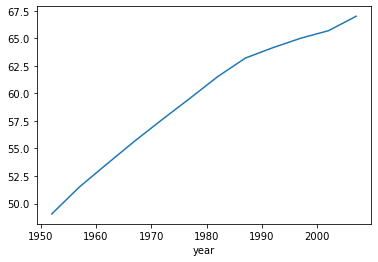

In [25]:
global_yearly_life_expectancy.plot()
plt.show() # Axes 정보 출력없이 그래프만 출력 가능

<AxesSubplot:xlabel='year'>

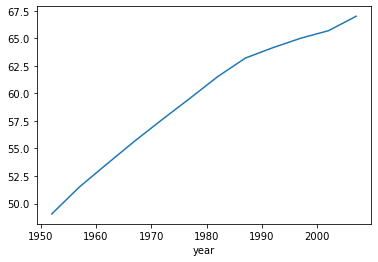

In [26]:
global_yearly_life_expectancy.plot() #Axes 정보도 함께 출력